# SPRING 2022 CMPE 462 PROJECT PHASE 1
#### Mehmet Selahaddin ŞENTOP - Halil Burak PALA
_Please run with Python 3.9.5 ._

## Question 1
### Part a)

Below code snippet includes helper functions provided.

In [1]:
# Helper functions: 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def sample_sphere(r=1, npoints=1000):
    dr = np.random.rand(npoints,1) # array of 1000 random values populated with uniform distribution over [0, 1)
    theta = 2*np.pi*np.random.rand(npoints,1) 
    x = dr * np.cos(theta)
    y = dr * np.sin(theta)
    return np.hstack((x,y)) # hstack stacks arrays in sequence horizontally (column wise)

def create_dataset(npoints=1000):
    points = sample_sphere(npoints=npoints) 
    points = np.hstack((np.ones(npoints).reshape(npoints,1), points))
    labels = np.sign(points[:, 2])
    return points, labels

The following code segment plots our dataset according to their labels. 
- `points` variable is a 1000 by 2 matrix, which every row is a  **x** = [_x1_,_x2_] point.
- `labels` variable is labels of these points, whether +1 or -1.
- `x1` variable is the second column of `points`, it will be the _x1_-axis of the graph.
- `x1` variable is the third column of `points`, it will be the _x2_-axis of the graph. 

(First column of `points` was filled with 1, in order to get bias term.)

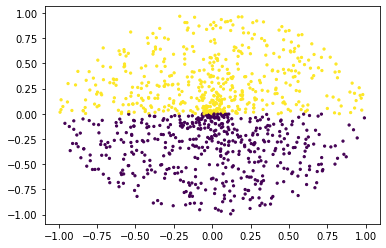

In [2]:
points, labels = create_dataset() 
x1 = points[:, 1]
x2 = points[:, 2]
size = np.ones(1000) * 5
plt.scatter(x1,x2,c=labels, s=size)
plt.show()

### Part b)

Perceptron learning algorithm's pseudo code is as follows:

                 weight = 0
                 for iteration t = 1,2,3,...:
                    for every point in the dataset:
                        if y * dotproduct(transpose(w),x) <= 0:
                            weight <- weight + y * x
                        endif
                    endfor
                    t <- t+1
                endfor

In our case, only 1 iteration is needed.

In [3]:
dimension = points.shape[1]
nofPoints = points.shape[0]

weight = np.zeros(dimension)

nofFalsePredictions = 0

for j in range(nofPoints):
    if labels[j] * np.dot(weight, points[j]) <= 0:
        nofFalsePredictions += 1
        weight += labels[j] * points[j]

error = nofFalsePredictions / nofPoints
accuracy = 1 - error

print("Weight vector: " + str(weight))
print("Accuracy: " + str(100 * accuracy) + "%")

Weight vector: [0.         0.00462066 2.93043407]
Accuracy: 97.6%


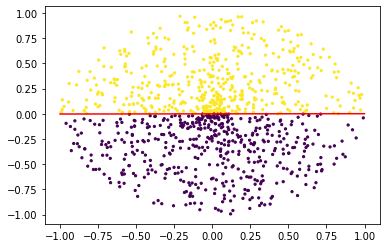

In [4]:
x_axis = x_axis = np.arange(-999,1000)/1000
y_axis = (weight[1] / weight[2]) * x_axis
plt.scatter(x1,x2,c=labels,s=size)
plt.plot(x_axis, y_axis, color="red")
plt.show()

### Part c)
Consider the OR function:

$$ \text{Input: }  \mathcal{X} = \left\{ \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ 1 \end{bmatrix} \right\} $$

$$ \text{Output: } \mathcal{Y} = \left\{ -1, +1 \right\} $$

$$ \text{Data: } \mathcal{D} = \left\{ \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix}, 0 \right), \left( \begin{bmatrix} 1 \\ 0 \end{bmatrix}, 1 \right), \left( \begin{bmatrix} 0 \\ 1 \end{bmatrix}, 1 \right), \left( \begin{bmatrix} 1 \\ 1 \end{bmatrix}, 1 \right) \right\} $$

$$ \mathcal{X} \in \mathbb{R}^2, \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \in \mathcal{X}, \left( \begin{bmatrix} x_1\\ x_2 \end{bmatrix}, y \right) \in \mathcal{D}$$

We can see the graph of the data by following code segment. 

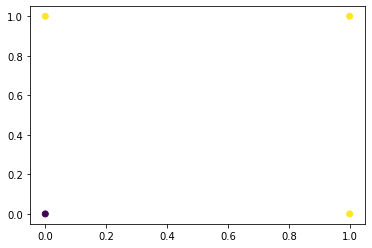

In [5]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([-1,1,1,1])
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

As it can be seen from the graph, this data is linearly seperable. Simply consider the line $$ x_1 + x_2 - 0.5 = 0 $$ It can be clearly seen that it correctly seperates the data:

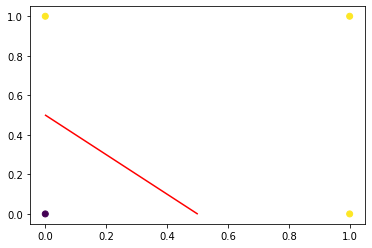

In [6]:
x_axis = np.arange(1,500)/1000
y_axis = -1 * x_axis + 0.5
plt.scatter(X[:,0],X[:,1],c=labels)
plt.plot(x_axis, y_axis, color="red")
plt.show()

Now, let our weight vector be $$ \mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} \in \mathbb{R}^2 $$ There is no bias term.

As we know, since we are in 2 dimensional space, $$ f(\mathbf{x}) = \mathbf{w}^{T} \cdot \mathbf{x} $$ defines a line that seperates the space.

$$ f(\mathbf{x}) = \mathbf{w}^{T}\mathbf{x} = [w_1 w_2] \cdot \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = w_1 x_1 + w_2 x_2 $$

It turns out that this linear seperator always passes through the origin (0,0) regardless of the value of the weight vector.

In our case, since $$ \mathbf{x}_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$ is a data point, every linear seperator passes through this data point and hence none of them can separate this dataset. 

## Question 2

In [7]:
import os
import re
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Part a)
Creating the matrix of size 10000x4096 of flattened gray scale vectors

In [9]:
orientations_train = np.load('/Users/palahb/Dropbox/ders/cmpe462/project/files/orientations_train.npy') # Labels of the training set images

# Empty numpy array to store the flattened gray scale training set images:
flattened_grayscale_train = np.zeros(shape=(10000, 4096))   

# Looping through all training set image files
for file in sorted(os.listdir('/Users/palahb/Dropbox/ders/cmpe462/project/files/3dshapes_train'), key=lambda f: int(re.sub('\D', '', f))): 
    
    file_path = os.path.join('/Users/palahb/Dropbox/ders/cmpe462/project/files/3dshapes_train', file)
    
    # Conversion to gray scale:
    grayscale_img = Image.open(file_path).convert('L') 
    
    # Conversion of gray scale image to flattened numpy array:
    flattened_grayscale_img = np.array(grayscale_img.getdata(), dtype=np.uint8) 
        
    # Adding the flattened gray scale image to the array of images initialized before the loop:
    flattened_grayscale_train[int(file.split('.')[0])] = flattened_grayscale_img 

### Part b)
Using the pseudo-inverse pinv(X) of the data matrix X, we get 

$$W^*=(X^T \cdot X)^{-1}\cdot X^T\cdot y$$

thereby finding the minimizer

In [10]:
# Transpose of the flattened gray scale training set images matrix:
flattened_grayscale_train_transpose = np.transpose(flattened_grayscale_train)

# Pseudo inverse of the flattened gray scale training set images matrix:
flattened_grayscale_train_pinv = np.linalg.pinv(np.matmul(flattened_grayscale_train_transpose,flattened_grayscale_train)) 

In [11]:
# Minimizing solution is calculated:
w = np.matmul(np.matmul(flattened_grayscale_train_pinv, flattened_grayscale_train_transpose),orientations_train)

### Part c)
Predicting the test data 

In [14]:
# Labels of the test set images:
orientations_test = np.load('/Users/palahb/Dropbox/ders/cmpe462/project/files/orientations_test.npy')

# Empty numpy array to store the flattened gray scale test set images:
flattened_grayscale_test = np.zeros(shape=(1000, 4096))

# Looping through all test set image files:
for file in sorted(os.listdir('/Users/palahb/Dropbox/ders/cmpe462/project/files/3dshapes_test'), key=lambda f: int(re.sub('\D', '', f))):
    file_path = os.path.join('/Users/palahb/Dropbox/ders/cmpe462/project/files/3dshapes_test', file)
    
    # Conversion to gray scale:
    grayscale_img = Image.open(file_path).convert('L')
    
    # Conversion of gray scale image to flattened numpy array:
    flattened_grayscale_img = np.array(grayscale_img.getdata(), dtype=np.uint8)
    
    # Adding the flattened gray scale image to the array of images initialized before the loop:
    flattened_grayscale_test[int(file.split('.')[0])] = flattened_grayscale_img 

In [15]:
predictions = np.zeros(1000)
for i in range(1000):
    predictions[i] = np.dot(w, flattened_grayscale_test[i]) # Result of predictions on test data

In [16]:
# Calculating Mean Square Error between predictions and target values:
mean_squared_error(predictions, orientations_test)

0.009510448749959134

In [17]:
print(w)

[ 1.00094167e-02  2.57834076e-01 -1.60701224e-01 ...  7.39477789e-04
  1.31057912e-04 -5.82315442e-04]


### Part d)
Using __PCA (Principal Component Analysis)__, we get 62 features which contribute for more than 95% of the variance of all 4096 features. We referred to [Towards Data Science](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) for the implementation of the PCA algorithm.

In [18]:
scaler = StandardScaler() # Scaler which will be used for standardising the data for optimal performance
scaler.fit(flattened_grayscale_train) # Computing the mean and std for standardisations below
train_standardised = scaler.transform(flattened_grayscale_train) # Standardising the training set
test_standardised = scaler.transform(flattened_grayscale_test) # Standardising the test set

In [19]:
# Applying PCA so that we preserve at least 95% of the variance of all 4096 features. 
# We decided that it is sufficiently much and it requires only 62 features:
pca = PCA(.95) 

pca.fit(train_standardised) # Fitting our PCA model to the training set

print('Number of features required to preserve at least 95% of the variations is', pca.n_components_)

Number of features required to preserve at least 95% of the variations is 66


In [20]:
# Applying the transformation to the training set using the PCA model we created:
train_standardised_pca = pca.transform(train_standardised)

# Applying the transformation to the test set using the PCA model we created:
test_standardised_pca = pca.transform(test_standardised) 

In [21]:
# Creating an instance of the Linear Regression model to re-apply it using selected features:
linear_regression = LinearRegression() 

In [22]:
# Fitting our model with selected features to the Linear Regression model:
linear_regression.fit(train_standardised_pca, orientations_train) 

LinearRegression()

In [23]:
# Predictions of our model with selected features over the test set:
predictions = linear_regression.predict(test_standardised_pca) 

In [24]:
mean_squared_error(predictions, orientations_test) # MSE of the reduced model over the test set

1.9349605550432274

In [28]:
pca.explained_variance_ratio_

array([0.28183831, 0.2690868 , 0.09756295, 0.05247985, 0.03604467,
       0.02064447, 0.01502364, 0.01460771, 0.01293122, 0.01127015,
       0.00833789, 0.00791016, 0.00761821, 0.00739316, 0.00673661,
       0.00582025, 0.00541056, 0.00434678, 0.00401603, 0.0037812 ,
       0.00359942, 0.00346047, 0.00324935, 0.00310848, 0.0029655 ,
       0.00277718, 0.00262444, 0.00255316, 0.00246706, 0.00235578,
       0.00226721, 0.00224277, 0.00213115, 0.00209509, 0.00197665,
       0.00195311, 0.00186545, 0.00182766, 0.00176656, 0.00166302,
       0.00164104, 0.00149603, 0.00141394, 0.00138582, 0.00134852,
       0.0013341 , 0.00125156, 0.00122523, 0.00119943, 0.00117949,
       0.00112313, 0.00110728, 0.00105988, 0.00105124, 0.00104622,
       0.00100484, 0.00098082, 0.00096527, 0.00094134, 0.00091652,
       0.0009037 , 0.00086486, 0.00083435, 0.00081457, 0.00078375,
       0.00077422])